In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data1.csv')

***Exploratory Data Analysis***

In [3]:
df.head()

,Sl. No.,State/UT,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude
0,1,Andaman and Nicobar Islands,2,0.0,2.0,NaN,3,11.667026,92.735983
1,2,Andhra Pradesh,17401,2100.0,2.0,NaN,222,14.750429,78.570026
2,3,Arunachal Pradesh,1,1.0,NaN,NaN,9,27.100399,93.616601
3,4,Assam,1161,1064.0,1.0,NaN,48,26.749981,94.216667
4,5,Bihar,7108,4587.0,2.0,25.0,83,25.785414,87.479973


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sl. No.                        36 non-null     int64  
 1   State/UT                       36 non-null     object 
 2   e2W                            36 non-null     int64  
 3   e3W                            33 non-null     float64
 4   e4W                            22 non-null     float64
 5   Electric Bus                   10 non-null     float64
 6   No of public charging station  36 non-null     int64  
 7   latitude                       36 non-null     float64
 8   longitude                      36 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.isnull().sum()

Sl. No.                           0
State/UT                          0
e2W                               0
e3W                               3
e4W                              14
Electric Bus                     26
No of public charging station     0
latitude                          0
longitude                         0
dtype: int64

We see that null values are there only in the e2w ,e3w & e4w columns. So it is safe to impute the missing value with zero.

## Treating null values

In [6]:
df1 = df.fillna(0)

In [7]:
df1.isnull().sum()

Sl. No.                          0
State/UT                         0
e2W                              0
e3W                              0
e4W                              0
Electric Bus                     0
No of public charging station    0
latitude                         0
longitude                        0
dtype: int64

In [8]:
df1 = df1.drop(['Sl. No.'],axis =1)

<AxesSubplot:>

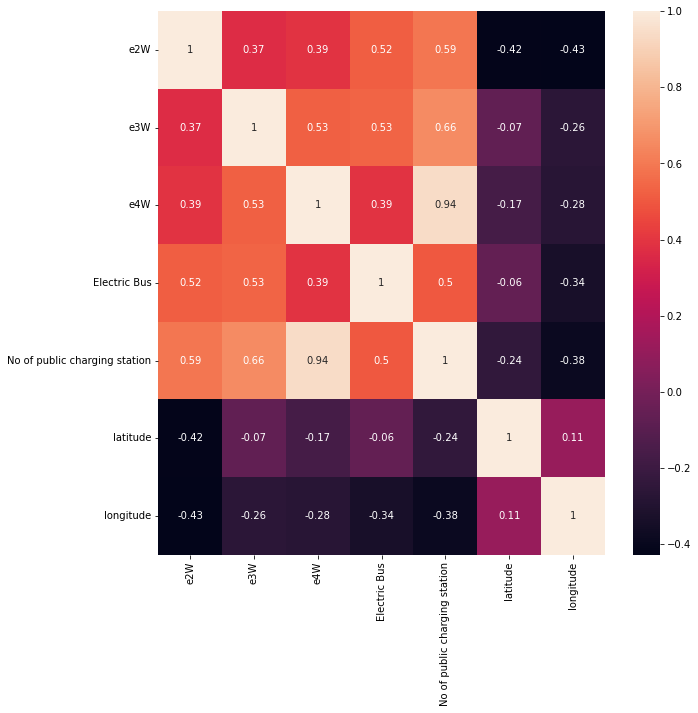

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df1.corr(),annot = True)

In [11]:
features = df1.drop(['State/UT'],axis =1)

In [12]:
features.describe()

,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,11901.444444,1479.111111,95.361111,39.833333,183.500000,22.780828,81.727931
std,18324.963722,2218.658305,335.149958,108.982698,337.027383,6.930364,7.459057
min,1.000000,0.000000,0.000000,0.000000,1.000000,8.900373,72.636867
25%,37.750000,15.750000,0.000000,0.000000,14.250000,18.965774,76.459999
50%,3649.500000,867.000000,2.000000,0.000000,48.000000,23.817899,78.310016
75%,16870.750000,2065.750000,23.000000,7.750000,201.750000,27.399993,88.401622
max,68710.000000,10298.000000,1918.000000,495.000000,1845.000000,34.299959,94.216667


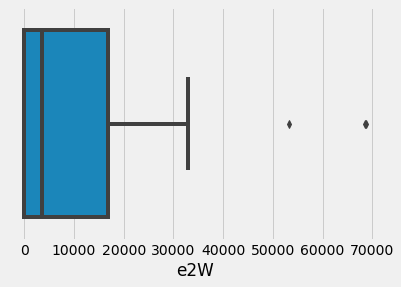

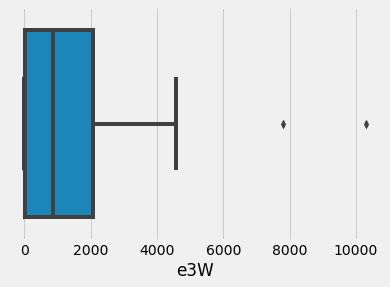

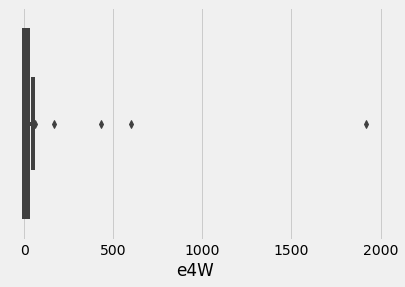

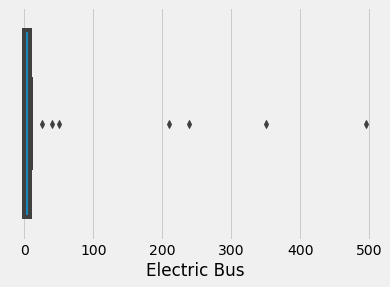

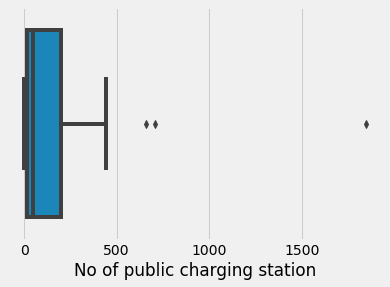

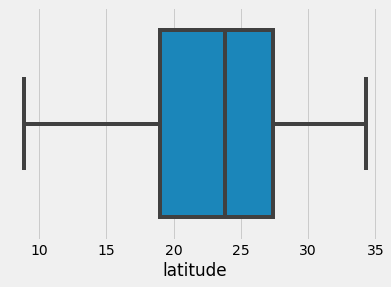

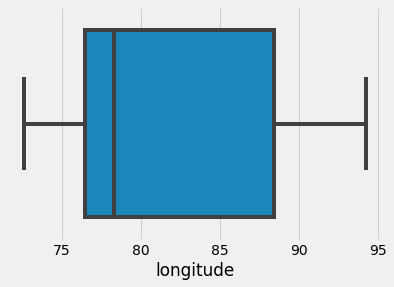

In [13]:
for col in features.columns:
    sns.boxplot(x = features[col])
    plt.show()

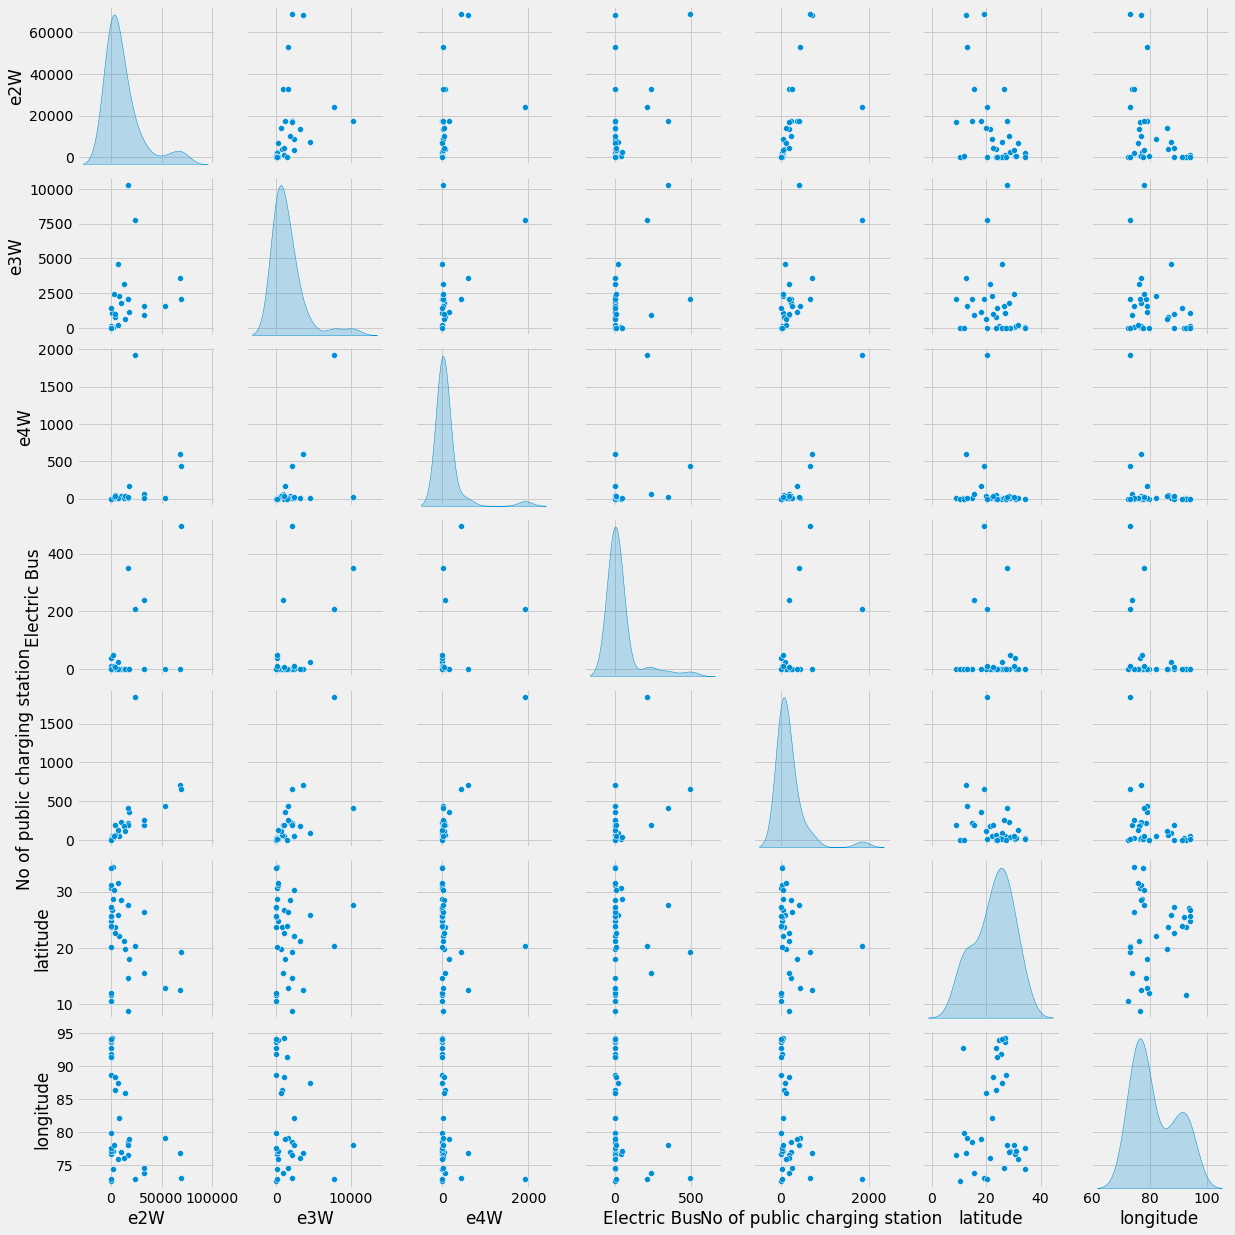

In [14]:
sns.pairplot(data = features , diag_kind='kde')

The above two graphs clearly shows that there are some outliers present in some features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [16]:
scaled_features.mean(axis = 0)

array([-3.54654577e-17,  3.08395285e-17, -6.16790569e-18,  3.08395285e-18,
        1.13720761e-17, -4.19032093e-16,  7.06225202e-16])

# Unsupervised learning

### Exploring different machine learning models for clustering

#### 1 . Kmeans

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

    # A list holds the SSE and silhouette coefficients values for each k
sse = []
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features[: , :4])
    sse.append(kmeans.inertia_)
    score = silhouette_score(scaled_features[: ,:3], kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0.5, 0.98, 'Graphs to find the optimal k value of Kmeans')

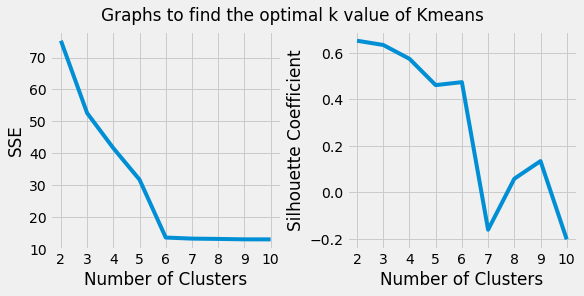

In [19]:
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(1,2,figsize = (8,4),layout='constrained')

axes[0].plot(range(2, 11), sse)
axes[0].set_xticks(range(2, 11))
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("SSE")

axes[1].plot(range(2, 11), silhouette_coefficients)
axes[1].set_xticks(range(2, 11))
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Coefficient")
fig.suptitle('Graphs to find the optimal k value of Kmeans')

In [20]:
#fitting the model with k =5
kmeans = KMeans(n_clusters=6, **kmeans_kwargs)
kmeans.fit(scaled_features[: , :4])
df_kmeans = df1.copy()
df_kmeans['kmeans_cat'] = kmeans.labels_

In [21]:
df_kmeans.columns

Index(['State/UT', 'e2W', 'e3W', 'e4W', 'Electric Bus',
       'No of public charging station', 'latitude', 'longitude', 'kmeans_cat'],
      dtype='object')

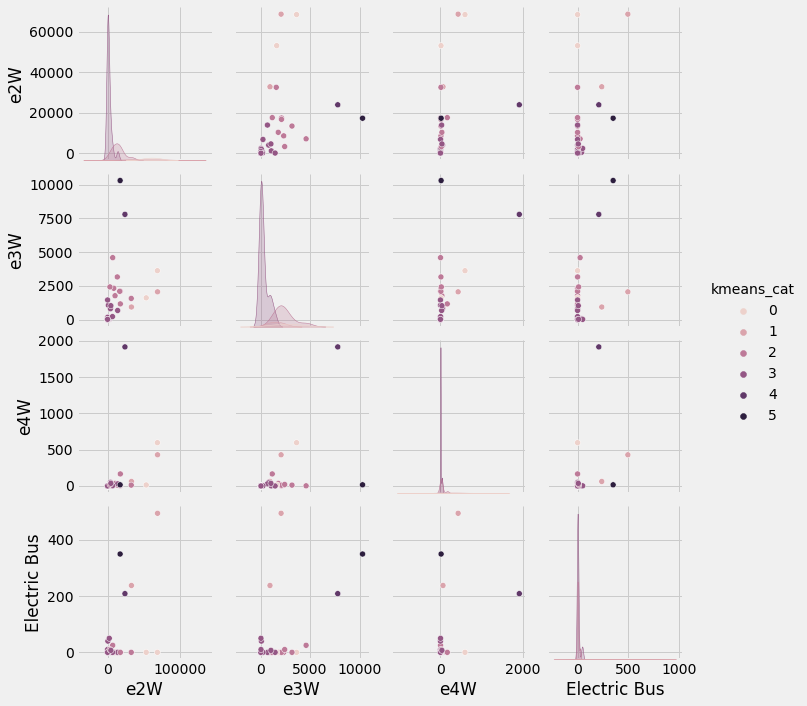

In [22]:
sns.pairplot(data = df_kmeans[['e2W','e3W','e4W','Electric Bus','kmeans_cat']],hue = 'kmeans_cat')

#### 2 . Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

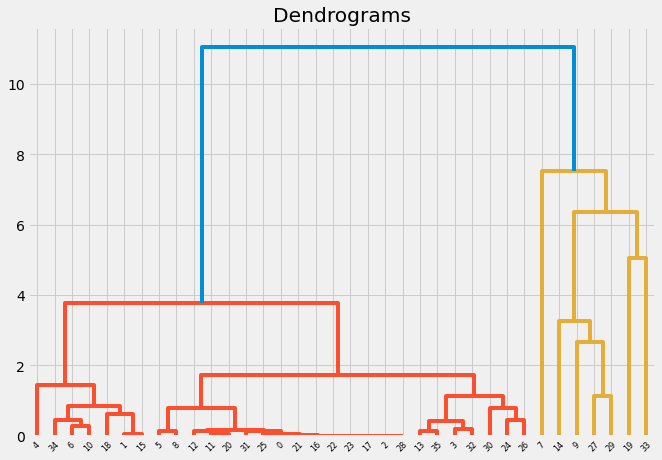

In [24]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features[: , :4], method='ward'))

In [25]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
df_hier = df1.copy()
df_hier['hier_cls'] = cluster.fit_predict(scaled_features[: , :4])

In [26]:
df_hier[df_hier['hier_cls'] == 0]

,State/UT,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude,hier_cls
9,Gujarat,32830,932.0,62.0,238.0,195,15.491997,73.818001,0
14,Karnataka,68508,3621.0,597.0,0.0,704,12.570381,76.919997,0
27,Rajasthan,32563,1567.0,12.0,0.0,254,26.449999,74.639981,0
29,Tamil Nadu,53151,1610.0,14.0,0.0,441,12.920386,79.150042,0


In [27]:
silhouette_score(scaled_features[: ,:4], df_hier['hier_cls'])

0.47728329946342934

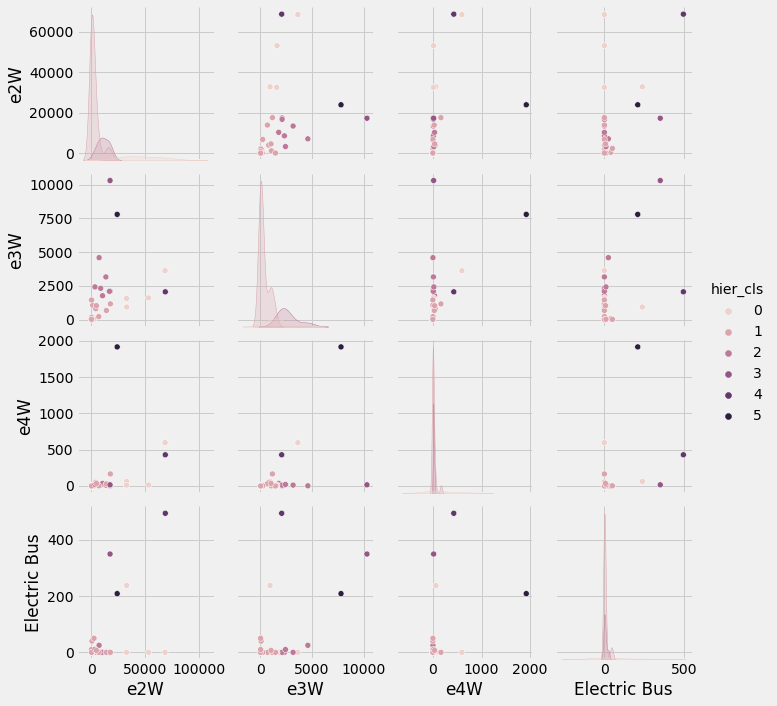

In [28]:
sns.pairplot(data = df_hier[['e2W','e3W','e4W','Electric Bus','hier_cls']] , hue = 'hier_cls')

## Profiling market segments

In [29]:
data = df_kmeans.drop(['State/UT','No of public charging station', 'latitude', 'longitude'],axis = 1)
index= data.drop('kmeans_cat',axis = 1).columns
index 

Index(['e2W', 'e3W', 'e4W', 'Electric Bus'], dtype='object')

In [30]:
data.mean()

e2W             11901.444444
e3W              1479.111111
e4W                95.361111
Electric Bus       39.833333
kmeans_cat          2.555556
dtype: float64

In [31]:
#creating data profiling table for k means

df_kmeans_cat_mean = pd.DataFrame(index= data.drop('kmeans_cat',axis = 1).columns)
for i in np.sort(data['kmeans_cat'].unique(),axis = None):
    temp_df = data[data['kmeans_cat'] == i]
    temp_mean = temp_df.mean(axis = 0)
    df_kmeans_cat_mean['seg' + str(i+1)] = temp_mean


In [32]:
df_kmeans_cat_mean['total'] = data.drop('kmeans_cat',axis = 1).mean()

In [33]:
df_kmeans_cat_mean

,seg1,seg2,seg3,seg4,seg5,seg6,total
e2W,60829.5,50770.0,14111.555556,1763.095238,23928.0,17296.0,11901.444444
e3W,2615.5,1494.0,2353.000000,274.428571,7791.0,10298.0,1479.111111
e4W,305.5,246.0,30.333333,5.857143,1918.0,16.0,95.361111
Electric Bus,0.0,366.5,3.888889,5.095238,209.0,350.0,39.833333


In [34]:
df_kmeans_cat_mean.reset_index().rename(columns = {'index': 'vehicle_category'})

,vehicle_category,seg1,seg2,seg3,seg4,seg5,seg6,total
0,e2W,60829.5,50770.0,14111.555556,1763.095238,23928.0,17296.0,11901.444444
1,e3W,2615.5,1494.0,2353.000000,274.428571,7791.0,10298.0,1479.111111
2,e4W,305.5,246.0,30.333333,5.857143,1918.0,16.0,95.361111
3,Electric Bus,0.0,366.5,3.888889,5.095238,209.0,350.0,39.833333


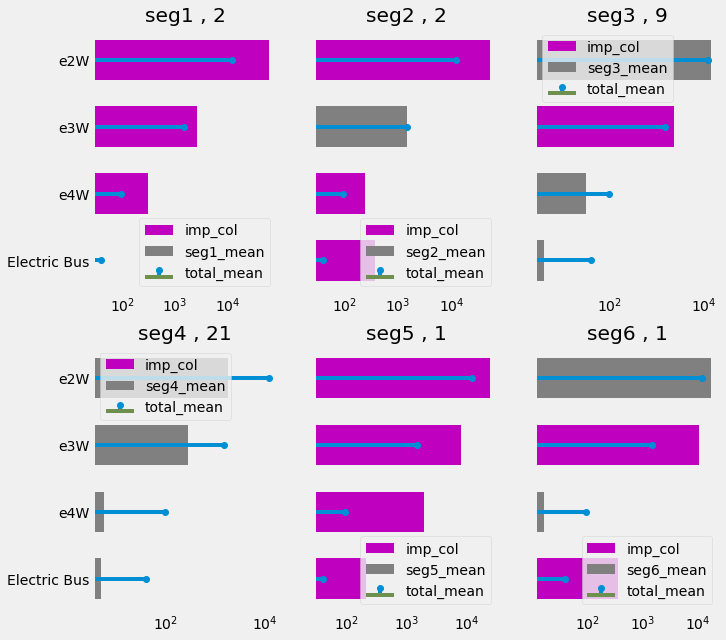

In [83]:

# Initialize the matplotlib figure
f, axes = plt.subplots(2,3,figsize=(10,10))
indx = df_kmeans_cat_mean.drop(['total'],axis =1).index

def significant_category(segment,df_sign):
    seg = segment
    seg_data = df_sign[seg]
    significant_rows = (seg_data > 3/2 * df_sign['total'] ).replace({True : 1 ,False : 0})*seg_data
    non_significant_rows = seg_data - significant_rows
    return significant_rows , non_significant_rows

def plot_graph(axes,col, y_ticks,df_cat, cat,df_sig):
    axes.set_xscale('log')
    temp_significane = significant_category(segment = col,df_sign = df_sig)
    out1 = axes.barh(width = temp_significane[0] , y = indx  ,height = 0.6,align = 'center',color ='m')
    out2 = axes.barh(width = temp_significane[1] , y = indx  ,height = 0.6,align = 'center',color ='gray')
    out3 = axes.stem( indx,df_sig['total'] , orientation = 'horizontal')

    if (not y_ticks):
        axes.set_yticks(indx,[None]*4)
    state_count = df_cat[df_cat[cat]==int(col[3]) -1 ].shape[0]
    axes.set_title(col + ' , ' + str(state_count))
    axes.invert_yaxis() # labels read top-to-bottom
    axes.legend(['imp_col',col+'_mean','total_mean'])
    axes.grid(False)
    return out1,out2,out3


column_rev_list = df_kmeans_cat_mean.drop(['total'],axis =1).columns[::-1].to_list()
for i in np.arange(2):
    for j in np.arange(3):
        segment_col = column_rev_list.pop()
        y_ticks = True if (j == 0) else False
        plot_graph(axes = axes[i][j] ,col = segment_col , y_ticks = y_ticks,df_cat = data , cat = 'kmeans_cat',df_sig =df_kmeans_cat_mean )
        if(len(column_rev_list)== 0 ):
            break


In [36]:
#creating data profiling table for agglomerative clustering
data2 = df_hier[['e2W','e3W','e4W','Electric Bus','hier_cls']]
df_hier_cat_mean = pd.DataFrame(index= data2.drop('hier_cls',axis = 1).columns)
for i in np.sort(data2['hier_cls'].unique(),axis = None):
    temp_df = data2[data2['hier_cls'] == i]
    temp_mean = temp_df.mean(axis = 0)
    df_hier_cat_mean['seg' + str(i+1)] = temp_mean
df_hier_cat_mean['total'] = data2.drop('hier_cls',axis = 1).mean()

In [37]:
df_hier_cat_mean

,seg1,seg2,seg3,seg4,seg5,seg6,total
e2W,46763.00,2482.500000,10978.714286,17296.0,68710.0,23928.0,11901.444444
e3W,1932.50,314.772727,2635.428571,10298.0,2056.0,7791.0,1479.111111
e4W,171.25,13.136364,13.571429,16.0,430.0,1918.0,95.361111
Electric Bus,59.50,4.863636,5.000000,350.0,495.0,209.0,39.833333


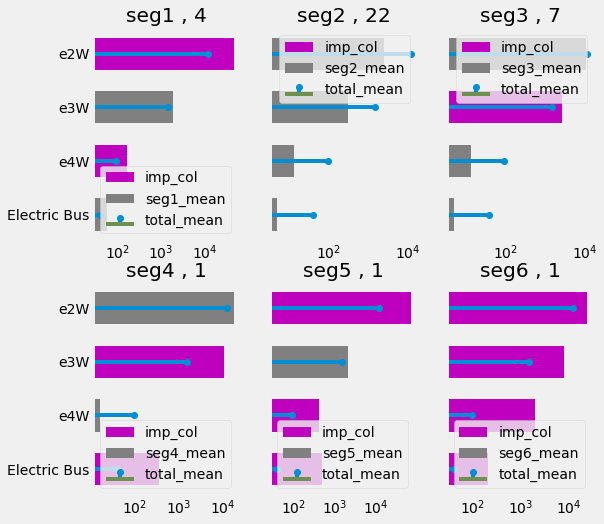

In [85]:
fig ,axes = plt.subplots(2,3,figsize = (8,8))
column_rev_list2 = df_hier_cat_mean.drop(['total'],axis =1).columns[::-1].to_list()

for i in np.arange(2):
    for j in np.arange(3):
        segment_col2 = column_rev_list2.pop()
        y_ticks2 = True if (j == 0) else False
        plot_graph(axes = axes[i][j] ,col = segment_col2 , y_ticks = y_ticks2,df_cat = data2 , cat = 'hier_cls',df_sig = df_hier_cat_mean)


In [76]:
df1[data2['hier_cls'] == 5]

,State/UT,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude
7,Delhi,23928,7791.0,1918.0,209.0,1845,20.266578,73.016618


In [40]:
cols = 'dkf1'
int(cols[3])

1

In [41]:
seg = "seg5"
seg_data = df_kmeans_cat_mean[seg]
significant_row = (seg_data > 3/2 * df_kmeans_cat_mean['total'] ).replace({True : 1 ,False : 0})*seg_data
non_significant_row = seg_data - significant_row
significant_row , non_significant_row

(e2W             23928.0
 e3W              7791.0
 e4W              1918.0
 Electric Bus      209.0
 dtype: float64,
 e2W             0.0
 e3W             0.0
 e4W             0.0
 Electric Bus    0.0
 dtype: float64)

In [45]:
#describing the segments based on other available features

<AxesSubplot:xlabel='No of public charging station', ylabel='kmeans_cat'>

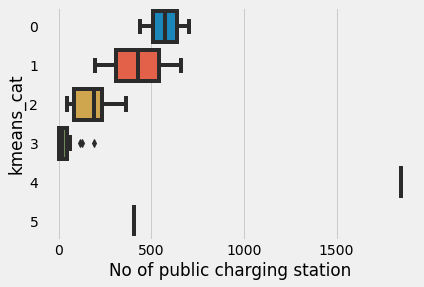

In [63]:
sns.boxplot(data = df_kmeans ,x = 'No of public charging station' ,orient = 'h' , y = 'kmeans_cat'  )

In [70]:
df_kmeans[data["kmeans_cat"]==4]

,State/UT,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude,kmeans_cat
7,Delhi,23928,7791.0,1918.0,209.0,1845,20.266578,73.016618,4


<AxesSubplot:xlabel='No of public charging station', ylabel='hier_cls'>

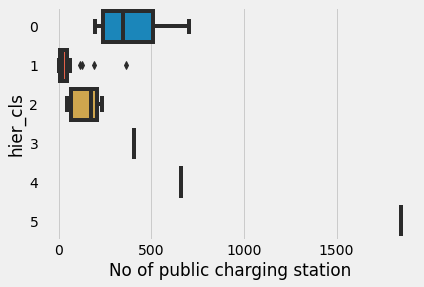

In [65]:
sns.boxplot(data = df_hier ,x = 'No of public charging station' ,orient = 'h' , y = 'hier_cls'  )

In [69]:
df_hier[df_hier['hier_cls'] == 5]

,State/UT,e2W,e3W,e4W,Electric Bus,No of public charging station,latitude,longitude,hier_cls
7,Delhi,23928,7791.0,1918.0,209.0,1845,20.266578,73.016618,5


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

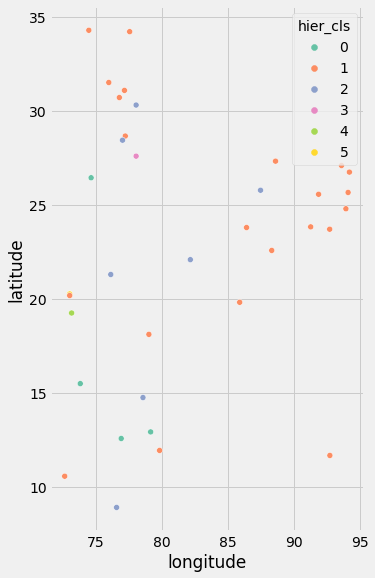

In [95]:
plt.figure(figsize = (5,9))
sns.scatterplot(data = df_hier , y = 'latitude' , x = 'longitude', hue = 'hier_cls',palette = "Set2")

Since we need a single location or state or UT it is ideal to see a segment with minimum number of states.

So , We select Delhi as the location for the start up.
Reasons:
We observe that profiling the segments based on the agglomerative algorithm gives a clear picture each category is distinct in terms of the visvalization we see.
And as the e4W in segment 6 (delhi) of hieralcical clustering has mean value much higer than total mean we choose vehicle as car.
Also from box plot it is clear, there are more charging station in delhi than any other state or segment 


So Delhi would be the ideal choice